In [639]:
import matplotlib.pyplot as plt
import pandas as pd

In [640]:
# data prep

# importing data
dataset = pd.read_csv("dataset.csv")
dataset.columns = [column.replace(" ", "") for column in dataset.columns] # removing spaces

# selecting necessary years
final = dataset.columns.get_loc("2019[YR2019]") + 1
sYear = final - 5
lYear = final - 20

sr.data = dataset.iloc[:, 0:3]
sr.data = sr.data.join(data.iloc[:, sYear:final])

# removing empty records
nan_value = float("NaN") 
sr.data.replace("..", nan_value, inplace=True)
sr.data.dropna(inplace=True)

# 
sr.unemployment = sr.data.loc[
    sr.data["SeriesName"] == "Unemployment, total (% of total labor force) (national estimate)"
]
sr.inflation = sr.data.loc[
    sr.data["SeriesName"] == "Inflation, consumer prices (annual %)"
]

sr.unemployment

,CountryName,CountryCode,SeriesName,2015[YR2015],2016[YR2016],2017[YR2017],2018[YR2018],2019[YR2019]
57,Albania,ALB,"Unemployment, total (% of total labor force) (...",17.1900005340576,15.4200000762939,13.6199998855591,12.3000001907349,11.4700002670288
281,Armenia,ARM,"Unemployment, total (% of total labor force) (...",18.2600002288818,17.6200008392334,17.7000007629395,18.9699993133545,18.2999992370605
345,Australia,AUS,"Unemployment, total (% of total labor force) (...",6.05000019073486,5.71000003814697,5.59000015258789,5.30000019073486,5.15999984741211
377,Austria,AUT,"Unemployment, total (% of total labor force) (...",5.71999979019165,6.01000022888184,5.5,4.84999990463257,4.48999977111816
409,Azerbaijan,AZE,"Unemployment, total (% of total labor force) (...",4.96000003814697,5,5,4.90000009536743,4.84999990463257
...,...,...,...,...,...,...,...,...
7673,Latin America & Caribbean (excluding high income),LAC,"Unemployment, total (% of total labor force) (...",6.44994447919559,7.64277751968385,7.96040119249532,8.10941642597029,8.29398395488271
7705,Latin America & the Caribbean (IDA & IBRD coun...,TLA,"Unemployment, total (% of total labor force) (...",6.50568522935775,7.67939449811889,8.01104515005914,8.16815280656465,8.23986193856442
7993,North America,NAC,"Unemployment, total (% of total labor force) (...",5.45792237771348,5.10219809580147,4.57650550548456,4.11135676297355,3.88954570819449
8057,OECD members,OED,"Unemployment, total (% of total labor force) (...",6.82942304726688,6.41447063914925,5.88667979118667,5.44198254389511,5.37222394268098


In [701]:
US.unemployment = sr.unemployment.loc[
    unemployment["CountryCode"] == "USA"
].iloc[:, 3:]
US.inflation = sr.inflation.loc[
    inflation["CountryCode"] == "USA"
].iloc[:, 3:]

amount1 = list()
for col in US.unemployment.columns:
    val = list(US.unemployment[col])
    for v in val:
        amount1.append(round(float(v), 3))
        
amount2 = list()
for col in US.inflation.columns:
    val = list(US.inflation[col])
    for v in val:
        amount2.append(
            round(float(v), 3)
        )
amount1, amount2

([5.28, 4.87, 4.36, 3.9, 3.67], [0.119, 1.262, 2.13, 2.443, 1.812])

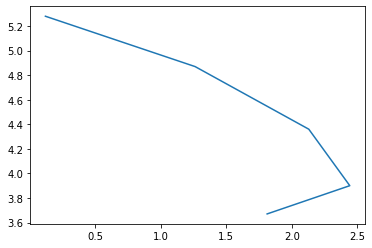

In [703]:
plt.plot(amount2, amount1)